# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This Dataset involves a collection of information from over a hundred thousand medical appointments in Brazil. <br>
It is focused on whether or not patients show up for their appointments with several characteristics that might be contributing factors as to why the patients do not show up for their appointments. <br>
There are a number of characteristics in the dataset about the patient included in each row.<br>
This Dataset has 14 columns which include; <br>
>- Patient ID - This is a unique identifier for each patient
>- Appointment ID - This is the appointment identification for the patients
>- Gender - Male/Female
>- Scheduled Day - This tells us the date the appointment was scheduled	
>- AppointmentDay	- This is indicates the appointment date
>- Age - The Age of the patients
>- Neighbourhood	- The location of the hospital
>- Scholarship - This indicates whether or not a patient is enrolled into the Bolsa Familia Scholarship
>- Hipertension - This indicates if the patient has Hypertension
>- Diabetes - This indicates if the patient has Diabetes
>- Alcoholism	- This indicates if the patient has an alcohol addiction
>- Handcap - This indicates if the patient is handicap
>- SMS_received	- This indicates if a patient received an appointment SMS or not.
>- No-show - This tells us if a patient showed up to their appointments or not.


### Question(s) for Analysis
> Determine the factors that influence a patient's visit on the appointed date e.g.,<br>
    >- Is there any relationship between the age and a patient's visit
    >- Are those who received SMS more likely to honor their appointment?
    >- Are those patients enrolled in the scholarship more likely to miss or make their appointments?
    >- Does ailment/disease play a role in influencing a Patient's visit for their appointment?



In [1]:
# Importing all my packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
> Below are the following Data Cleaning steps applied to the dataset <br>
>- This dataset has no missing data,
>- There are 110,527 rows which are all populated in for each variable.
>- There are no duplicated rows,
>- The data type for each variable matches correctly except for appointment day and sceduled day which should be in datetime
>- For uniformity, the column names are changed to lower case and underscores are used to replace hyphens.
>- The attributes in the column no_show is converted to *'Didnt show'* and *'Showed up'* for better understanding
>- One row in the column age has a value < 0 which is obviously incorrect and is converted to the mean age.
>- The column appointment_id and neighbourhood are dropped seeing that we do not require them for this analysis.


In [2]:
# Importing my dataset
df_appointments = pd.read_csv('noshowappointments.csv')
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,39218,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
1,43742,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No
2,93780,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
3,141724,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
4,537615,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No


In [3]:
df_appointments.shape

(110527, 14)

In [4]:
df_appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921800e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


### Data Cleaning
> The following steps are the data cleaning activities performed in this project. <br>
>1. The code above shows confirms the number of rows and columns in the dataset. <br>
>2. Also, all the data types for each variable is correct except for the appointment and sceduled date which should be in datettime format.<br>
>3. There are also no null or missing records in the data set. <br>
>4. Notice that the column names and seperators are not uniform. <br>
>5. From the describe code we can see that the minimum age is a negative value which must be incorrect, also we can see that a most of the patients do not have any of the ailments (all of these will be addressed later) <br>
> **We will now go ahead and clean up the data based on these findings**

In [6]:
# checking for duplicates
sum(df_appointments.duplicated())

0

In [7]:
# converting all column names to lower case and using underscore as seperators
df_appointments.rename(columns = lambda x: x.strip().lower().replace("-","_"), inplace = True)

In [8]:
# converting scheduledday and appointmentday from string to datetime
df_appointments['appointmentday'] = pd.to_datetime(df_appointments['appointmentday'])
df_appointments['scheduledday'] = pd.to_datetime(df_appointments['scheduledday'])

In [9]:
df_appointments.drop(['patientid','appointmentid'], axis = 1, inplace = True)

In [10]:
df_appointments['no_show'].unique()

array(['No', 'Yes'], dtype=object)

> The line of code above displays the unique values in the column no_show <br>
> The next line of code convert the unique values *'Yes'* and *'No'* displayed above in the no_show column into *'Didnt show'* and *'Showed up'* for more clarity.

In [11]:
no_show_map = {'Yes' : 'Didnt show', 'No' : 'Showed up'}
df_appointments['no_show'] = df_appointments['no_show'].map(no_show_map)
df_appointments['no_show'] = df_appointments['no_show']

In [12]:
df_appointments.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44,PRAIA DO SUÁ,0,0,0,0,0,0,Showed up
1,M,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39,MARIA ORTIZ,0,0,1,0,0,0,Showed up
2,F,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33,CENTRO,0,0,0,0,0,0,Showed up
3,M,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12,FORTE SÃO JOÃO,0,0,0,0,0,0,Showed up
4,F,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14,FORTE SÃO JOÃO,0,0,0,0,0,1,Showed up


#### Data Cleaning cont'd
> The above lines of code is to do the following; <br>
    >- check the dataset for duplicates (no duplicates were found) <br>
    >- convert all column names to lower case and use underscore (_) as separators and,
    >- convert the data types for columns: scheduledday and appointmentday to datetimes.
    >- columns patientid and appointmentid have also been dropped as we would not require them for this analysis.
    >- values in the column no_show has also been changed for better clarity

In [13]:
#checking the max and min ages to ensure all values are correct
df_appointments['age'].max(), df_appointments['age'].min()

(115, -1)

In [14]:
#Based on the incorrect age value of -1, we will be changing that value to the mean age.
mean_age = df_appointments['age'].mean()
mean_age

37.08887421173107

In [15]:
for i in range(df_appointments.shape[0]):
    if df_appointments.age.iloc[i] < 0:
        df_appointments.age.iloc[i] = 37

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


> The code above is to replace any incorrect age less than 0 with the mean of the age column

In [16]:
#confirming the change have been made
df_appointments.query('age < 0')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [17]:
#collapsing the hipertension, diabetes, alcoholism and handcap columns into one column called ailment.
df_appointments.loc[(df_appointments['hipertension'] == 1) | (df_appointments['diabetes'] == 1) | 
       (df_appointments['alcoholism'] == 1) | (df_appointments['handcap'] == 1), 'ailment'] = 'one_or_more' 
df_appointments.loc[(df_appointments['hipertension'] == 0) & (df_appointments['diabetes'] == 0) & 
       (df_appointments['alcoholism'] == 0) & (df_appointments['handcap'] == 0), 'ailment'] = 'none'

> The code block written above is used to create a new column that groups all the associated ailments or diseases into 2 groups. We have *hipertension, diabetes, alcoholism and handcap* all spread accross multiple rows, to make this analysis clearer I have grouped the aliments into **None** (this represents patients with no ailment) and **one_or_more** (this represents patients with one or more of the above listed ailments). <br>

#### Data Cleaning cont'd
> The above lines of code is to do the following; <br>
    >- check the age column for invalid values using min and max <br>
    >- change all invalid values to the mean age.
    >- collapse all the columns related to dieases into one column (ailment)

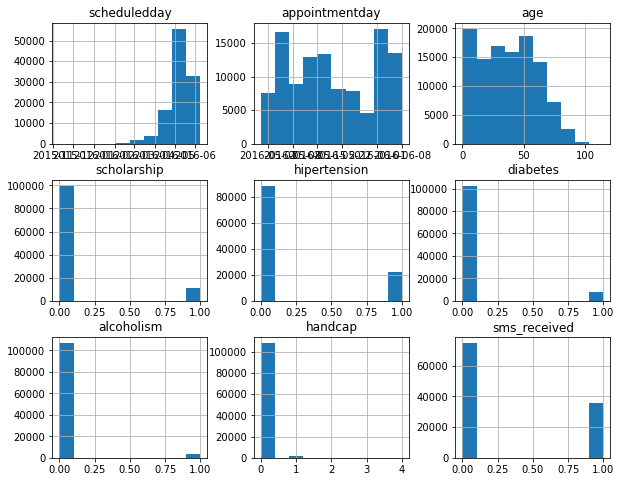

In [18]:
df_appointments.hist(figsize = (10, 8));

In [19]:
df_appointments.drop(['hipertension', 'diabetes', 'alcoholism', 'handcap'], axis = 1, inplace = True)

In [20]:
df_appointments.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,sms_received,no_show,ailment
0,F,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44,PRAIA DO SUÁ,0,0,Showed up,none
1,M,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39,MARIA ORTIZ,0,0,Showed up,one_or_more
2,F,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33,CENTRO,0,0,Showed up,none
3,M,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12,FORTE SÃO JOÃO,0,0,Showed up,none
4,F,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14,FORTE SÃO JOÃO,0,1,Showed up,none


#### Data Cleaning cont'd
> The visual above is to confirm some of our findings from the dataset; <br>
    >- From the visual it is clear that majority of the patients age ranges from 0 to about 60+ years <br>
    >- A majority of the patients are not enrolled in the Bolsa Familia scholarships <br>
    >- Most of the patients do not have the ailments listed <br>
    >- Most of the patients did not receive SMS notification of their appointments. <br>
    
> The hipertension, diabetes, alcoholism and handcap columns have been dropped since we have collapsed them into one column and would not be required any longer.
    
> These Characteristics will be further anaylsed; For the purpose of this analysis, **no_show** is my dependent variable while *age*, *scholarship*, *sms_received*, *ailment/disease* will be my independent variables.

<a id='eda'></a>
## Exploratory Data Analysis




### Is Age a determining factor of a Patient's visit?

In [21]:
no_show_mean = df_appointments.groupby('no_show', as_index = False)['age'].mean()
no_show_mean

,no_show,age
0,Didnt show,34.317667
1,Showed up,37.790495


> The mean age for patients who didnt show up is less than those that showed up, this is further illustrated in the chart below;

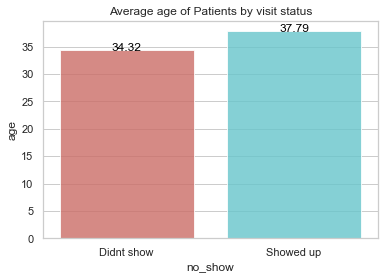

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'no_show', y = 'age', palette = 'hls', alpha = .8, data = no_show_mean, ci = None)
ax.set_title("Average age of Patients by visit status")
for index, row in no_show_mean.iterrows():
    ax.text(row.name, row.age, round(row.age, 2),
            color='black', ha='center')

In [23]:
didntshow = df_appointments.no_show == 'Didnt show'
showedup = df_appointments.no_show == 'Showed up'

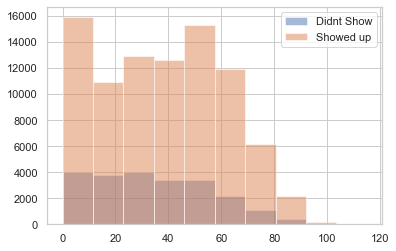

In [24]:
df_appointments.age[didntshow].hist(alpha = 0.5, label = 'Didnt Show')
df_appointments.age[showedup].hist(alpha = 0.5, label = 'Showed up')
plt.legend();

#### Observations
> From the chart above we can see that the mean age for both customers that showed up for their appointments and those that did not are not too far off from each other. The histogram also shows clearly that the number of Patients that showed up for their appointments are more than those that did not however, the distribution is spread similarly accross the age in both cases which suggests that the Age is not a determining factor of a Patient's visit.

### Are Patients who received SMS more likely to honor their appointment?

In [25]:
df_sms = df_appointments.groupby('sms_received')['no_show'].count()

In [26]:
sms_map = {1 : 'yes', 0 : 'no'}
df_sms.index = df_sms.index.map(sms_map)

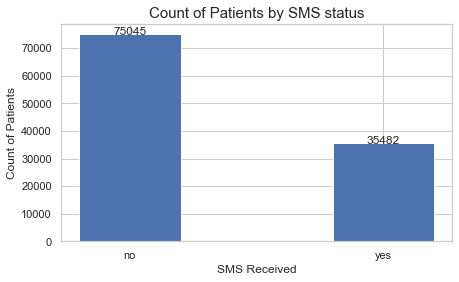

In [27]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1],y_list[i-1], ha="center")
        
plt.subplots(figsize=(7, 4))
plt.bar(df_sms.index, df_sms, width = 0.4)
add_value_label(df_sms.index, df_sms)
plt.title('Count of Patients by SMS status', fontsize = 15)
plt.xlabel('SMS Received')
plt.ylabel('Count of Patients');

> The **Count of Patients by SMS status** Chart shows the distribution of patients by SMS notification. We can see here that a larger percentage of the patient population did not receive SMS notification, would this suggest an impact or influence in a patient's visit? More analysis below to determine this.

In [28]:
df_sms_noshow = df_appointments[['sms_received','no_show']]
df_sms_noshow['sms'] = df_appointments['sms_received'].map(sms_map)


<ipython-input-28-afd4749005b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sms_noshow['sms'] = df_appointments['sms_received'].map(sms_map)


> The code cell above is to create a subset of the data into a new dataframe. Following which we add a new column that represents the sms_received column in integer (0 and 1) to enable the creation of the multiple bar chart below;

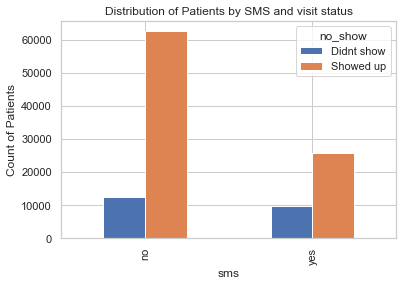

In [29]:
pd.pivot_table(df_sms_noshow, index = 'sms', values = 'sms_received', columns = 'no_show',
                    aggfunc='count').plot(title = 'Distribution of Patients by SMS and visit status',
                                          ylabel = 'Count of Patients', kind = 'bar');

#### Observations

> The **Distribution of Patients by SMS and Visit status** Chart above shows the distribution of patients that showed up for their appointments and those that did not based on whether or not they received SMS notification. The earlier chart clearly showed that a larger number of the population did not receive SMS, this second chart is created in an attempt to see if we have more patients that did not show up amongst those that did not receive SMS. However, that is not the case and we can suggest from these findings that SMS is not a determining factor of the patients visit for their appointment.

### Are Patients enrolled in the scholarship more likely to miss or make their appointments?

In [30]:
df_sch = df_appointments.groupby('scholarship', as_index = False)['no_show'].count()
df_tot = df_appointments['no_show'].count()
df_sch['percent'] = df_sch['no_show'] / df_tot * 100
df_sch

,scholarship,no_show,percent
0,0,99666,90.173442
1,1,10861,9.826558


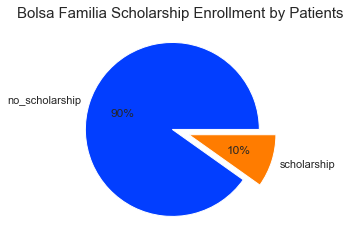

In [31]:
data = df_sch['percent']
explode = [0.1, 0.1]
labels = ['no_scholarship', 'scholarship']
colors = sns.color_palette('bright')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)
plt.title('Bolsa Familia Scholarship Enrollment by Patients', fontsize = 15)
plt.show()

> We have used a pie chart to illustrate the number of patients based on whether or not they are enrolled into the Bolsa Familia scholarship program. It is clear that a large percentage of the patient population are not enrolled into the scholarship program. <br>
> We would further look into the 10% of the base that are enrolled into this scholarship program to determine their response to the scheduled appointments.

In [32]:
df_yes_sch = df_appointments.loc[df_appointments['scholarship'] == 1]

In [33]:
yes_sch = df_yes_sch.groupby(['scholarship','no_show'], as_index = False)['scholarship'].count()
yes_sch

,no_show,scholarship
0,Didnt show,2578
1,Showed up,8283


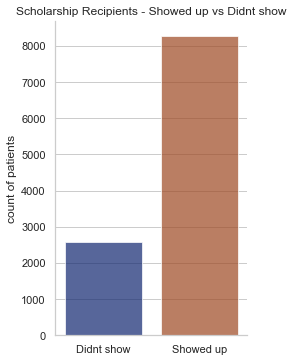

In [34]:
ap = sns.catplot(x = 'no_show', y='scholarship', palette = 'dark',
                 aspect = .7, alpha = .7, data= yes_sch, kind = 'bar', legend = True)
ap.set_axis_labels("", "count of patients")
ap.set(title = 'Scholarship Recipients - Showed up vs Didnt show');

> The chart above illustrates that the number of scholarship-enrolled patients that showed up to their appointment is higher than those that did not show up. This is also the case for patients not enrolled in the scholarship. The available data does not suggest that being enrolled to the Bolsa Familia scholarship influences the patient's visit.

### Does ailment/disease play a role in influencing a Patient's visit for their appointment?

> Finally, we will go ahead and analyse the distribution of patients by ailment and determine if ailment can be an influencing factor.

In [35]:
df_ailment = df_appointments.groupby('ailment', as_index = False)['no_show'].count()
df_ailment['percent'] = df_ailment['no_show'] / df_tot * 100
df_ailment

,ailment,no_show,percent
0,none,84115,76.103577
1,one_or_more,26303,23.797805


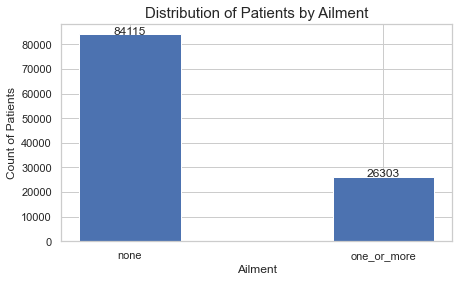

In [36]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1],y_list[i-1], ha="center")
        
plt.subplots(figsize=(7, 4))
plt.bar(df_ailment['ailment'], df_ailment['no_show'], width = 0.4)
add_value_label(df_ailment['ailment'], df_ailment['no_show'])
plt.title('Distribution of Patients by Ailment', fontsize = 15)
plt.xlabel('Ailment')
plt.ylabel('Count of Patients');

> The chart above clearly shows that a larger population (76%) of the patients do not have any of the listed disease. We would further check if ailment is an influencing factor by checking if there is a lower turn out of patients with ailments attending their appointments compared to those with no ailment.

In [37]:
df_ailment_noshow = df_appointments[['ailment','no_show']]
ailment_map = {'none' : 1, 'one_or_more' : 0}
df_ailment_noshow['ailment_ind'] = df_ailment_noshow['ailment'].map(ailment_map)

<ipython-input-37-6daf9c007323>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ailment_noshow['ailment_ind'] = df_ailment_noshow['ailment'].map(ailment_map)


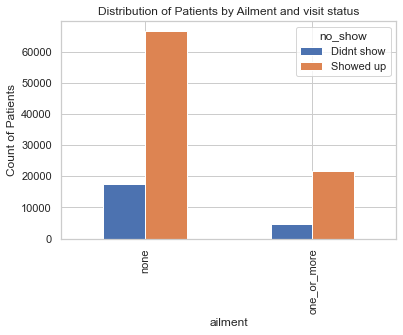

In [38]:
pd.pivot_table(df_ailment_noshow, index = 'ailment', values = 'ailment_ind', columns = 'no_show',
                    aggfunc='count').plot(title = 'Distribution of Patients by Ailment and visit status',
                                          ylabel = 'Count of Patients', kind = 'bar');

#### Observations
> From the chart above showing the distribution of patients by ailment and visit status, we can see that the number of patients that showed up in both cases (patients with no ailment or one/more ailment) is relatively high compared to those that did not show up. Whether or not a patient has an ailment does not influence the patient's visit for their appointment. One would have expected that patients with one/more ailments might struggle with keeping up with their appointment, however reverse is the case as we can see a high count of those that showed for both patients with and without ailment in comparison to those that did not show up for their appointments. We can infere that ailment is not an influencing factor.

<a id='conclusions'></a>
## Conclusions

> From the analysis done above with the dataset available, it is not fully clear what factors influence the patient's visit for their appointment however we are able to establish the lack of relationships between some of the variables available and the tendency of a patient's visit. <br>
> We can see that there is no relationship between the age of the Patient and their likelihood to visit on their appointment day, this is also the same for those that receive SMS; one would expect that there should be a better turn out for patient's that receive SMS notification but from the analysis above we can see that a patient receiving SMS did not necessarily effect a better turn out. <br>
> Also, another independent variable considered in this analysis is the Boslia Familia scholarship. Investigating to determine if patients enrolled to the scholarship would be more likely to make their appointments also showed that it was not an influencing factor. For the 10% of the patient population that enrolled in the scholarship, 76% of these patients showed up for their appointment similar to the 80% of patients that showed up amongst the patients not enrolled into the scholarship. This indicates that a patient having the scholarship does not necessarily mean that they would show up for their appointment. <br>
> Lastly, ailment or disease was the final variable considered, this analysis showed that there is no relationship between ailment and the tendency of a patient keeping to their appointment. 
The characteristics of the patients (those that showed up and those that did not) accross all the variables considered are similar and none of the independent variables considered proved to be factors that can predict or influence a patient's visit. Based on this analysis, the available data does not suggest that any of the variables considered can influence the patient's visit for their appointment. 

##### Limitations
> Although this dataset was mostly clean, some additional information such as occupation of the patients and location or address of the patients would have probably been more variables to help us determine factors that might influence a patient's visit. <br>
> A more robust dataset that covers a year or more would be more suitable to use for predicting factors that can influence a patient's visit. 
> Having more historical data would have helped us look at trends at different times in a year to determine if there are other factors such as weather, holidays etc. that could influence a patient's visit on the appointed date.

## References 
>- https://datatofish.com/if-condition-in-pandas-dataframe/
>- https://www.geeksforgeeks.org/how-to-add-a-title-to-seaborn-plots/
>- https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/
>- https://seaborn.pydata.org/tutorial/color_palettes.html
>- https://www.statology.org/pandas-pivot-table-count/
>- https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/
>- https://www.pluralsight.com/guides/cleaning-data-using-python
>- https://datatofish.com/strings-to-datetime-pandas/
>- https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe
>- https://www.kaggle.com/datasets/joniarroba/noshowappointments